# QCTO - Workplace Module

### Project Title: Insurance Project
#### Done By: Shaneen Dickinson


---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

 **Purpose:** 
* The African insurance industry remains significantly underdeveloped despite the continent's large and growing population. With only about 1% of global insured catastrophe losses and insurance premiums totaling $45 billion in 2017, there is a clear gap in coverage, awareness, and accessibility.

* This project aims to explore and analyze raw insurance claims data to uncover insights that can help address key challenges in the industry—namely affordability, limited insurance knowledge, and ineffective market targeting. By leveraging data-driven analysis, we seek to support more inclusive and efficient insurance strategies that can better serve African communities.

* The findings from this analysis will inform recommendations for improving customer segmentation, enhancing education around insurance, and identifying opportunities for more affordable and accessible insurance products.

 **Details:** 

The insurance industry in Africa faces a unique set of challenges. Despite being home to 17% of the global population, the continent contributes only about 1% to global insured catastrophe losses. This disparity highlights a lack of coverage, awareness, and accessibility in the region. In 2017, Africa's total insurance premiums were valued at $45 billion—far below its potential.

Several factors contribute to this underdevelopment:
- **Affordability**: The average daily expense for insurance is around $25, which is significantly lower than in other regions. While South Africa has a relatively high average salary, many other countries face economic constraints.
- **Insurance Knowledge**: Many individuals question the value of paying for a risk that may never materialize, indicating a gap in understanding and trust.
- **Target Marketing**: With unemployment rates around 30% and less than half of the market falling below key income thresholds, identifying and reaching viable customer segments is a major challenge.

---

### Key Questions
This project aims to address the following questions:
- What patterns exist in insurance claims across different regions and demographics?
- How does affordability influence claim behavior and insurance uptake?
- Which customer segments are most underrepresented or underserved?
- What strategies can be derived from the data to improve insurance education and targeting?

---

### Relevance

Understanding these dynamics is crucial for designing inclusive insurance products and outreach strategies. By analyzing raw claims data, we can uncover insights that help insurers better serve African communities, reduce risk exposure, and promote financial resilience across the continent.

---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>


In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and clustering (optional, for segmentation)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Date and time handling
import datetime

# Display settings for better visuals
%matplotlib inline
sns.set(style="whitegrid")





---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** To load and describe the raw insurance claims data for further analysis
* **Details:** 
The dataset was sourced from a public GitHub repository and contains insurance claims data relevant to the African market. It is stored in an Excel workbook format and includes multiple sheets. The data includes both numerical and categorical variables such as claim amounts, customer demographics, and claim types.

The file is loaded using `pandas.read_excel()` with the `openpyxl` engine, and the first few rows are displayed to understand the structure and contents of the dataset.

---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [3]:

# Load the Excel workbook
xl = pd.read_excel('data/insurance_claims_raw.xlsx', sheet_name=None, engine='openpyxl')

# Print available sheet names
print("Available sheets:", xl.keys())

# Preview the first few rows of the first sheet
first_sheet = list(xl.keys())[0]
print(f"\nPreview of sheet: {first_sheet}")
xl[first_sheet].head()


Available sheets: dict_keys(['insurance_claims'])

Preview of sheet: insurance_claims


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [6]:

# Load the Excel workbook
file_path = 'data/insurance_claims_raw.xlsx'  # Adjust if needed
xl = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')

# Get the first sheet name and load it into a DataFrame
first_sheet_name = list(xl.keys())[0]
df = xl[first_sheet_name]

# Step 1: Check and handle missing values
print("Missing values per column:")
print(df.isnull().sum())


# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)


# Fill remaining missing values
if 'claim_amount' in df.columns:
    df['claim_amount'] = df['claim_amount'].fillna(df['claim_amount'].median())
if 'region' in df.columns:
    df['region'] = df['region'].fillna('Unknown')
if 'claim_type' in df.columns:
    df['claim_type'] = df['claim_type'].fillna('Unspecified')


# Step 2: Remove outliers in claim_amount using IQR
if 'claim_amount' in df.columns:
    Q1 = df['claim_amount'].quantile(0.25)
    Q3 = df['claim_amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df['claim_amount'] >= lower_bound) & (df['claim_amount'] <= upper_bound)]

# Step 3: Standardize region names
if 'region' in df.columns:
    df['region'] = df['region'].astype(str).str.strip().str.title()

# Step 4: Filter claims with amount greater than 100
if 'claim_amount' in df.columns:
    df = df[df['claim_amount'] > 100]

# Display cleaned data
print("\nCleaned Data Overview:")
print(df.info())
print(df.head())



Missing values per column:
months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
p

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [7]:

# Step 1: Summary statistics
print("Summary statistics:")
print(df.describe())


Summary statistics:
       months_as_customer         age  policy_number  \
count         1000.000000  998.000000    1000.000000   
mean           203.954000   38.962926  546238.648000   
min              0.000000   19.000000  100804.000000   
25%            115.750000   32.000000  335980.250000   
50%            199.500000   38.000000  533135.000000   
75%            276.250000   44.000000  759099.750000   
max            479.000000   64.000000  999435.000000   
std            115.113174    9.135425  257063.005276   

                    policy_bind_date  policy_deductable  \
count                           1000         998.000000   
mean   2002-02-08 04:40:47.999999872        1134.268537   
min              1990-01-08 00:00:00         500.000000   
25%              1995-09-19 00:00:00         500.000000   
50%              2002-04-01 12:00:00        1000.000000   
75%              2008-04-21 12:00:00        2000.000000   
max              2015-02-22 00:00:00        2000.000000   
std

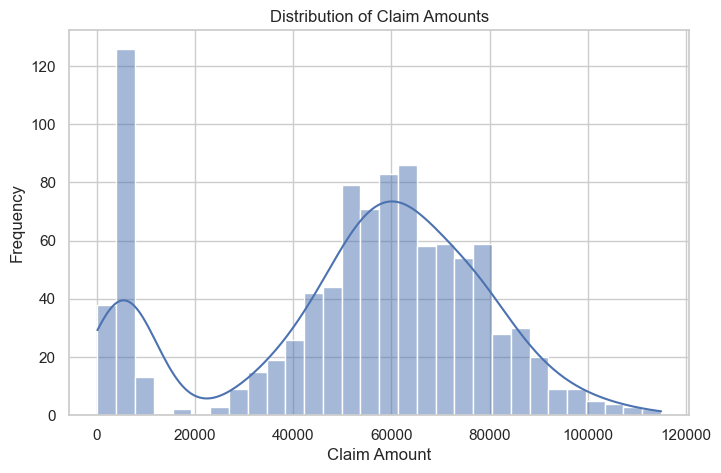

In [9]:

# Step 2: Histogram of claim amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['total_claim_amount'], bins=30, kde=True)
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()


---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
